In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import torch
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#unzip and load dataset
!unzip hmnist_28_28_RGB.csv.zip

Archive:  hmnist_28_28_RGB.csv.zip
  inflating: hmnist_28_28_RGB.csv    


In [3]:
data_path='hmnist_28_28_RGB.csv'
data_frame=pd.read_csv(data_path)
data_frame.head(20)

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
5,8,1,3,19,5,10,26,8,13,34,...,12,3,7,5,0,1,4,0,0,2
6,194,147,137,197,148,139,197,148,132,200,...,211,160,163,211,162,166,208,162,166,2
7,161,121,105,169,128,119,172,129,116,176,...,141,103,92,87,59,56,32,18,19,2
8,125,84,85,165,114,118,181,120,125,188,...,119,80,79,62,35,41,19,8,13,2
9,228,179,194,227,174,191,226,165,182,215,...,217,142,156,219,154,166,216,146,154,2


In [4]:
data_frame.shape

(10015, 2353)

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Columns: 2353 entries, pixel0000 to label
dtypes: int64(2353)
memory usage: 179.8 MB


In [6]:
data_frame.describe()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
count,10015.000000,10015.000000,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,...,10015.00000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000,10015.000000
mean,181.056415,131.728407,141.24024,187.274488,137.089466,147.206191,192.358862,141.796405,152.211782,196.177234,...,184.68657,138.416875,144.061508,178.656216,133.217474,138.752172,172.307239,127.871193,133.144483,3.720919
std,59.746698,45.043473,48.67267,54.021274,41.138096,44.661091,48.267713,37.382709,40.725174,43.892249,...,47.02376,38.393007,41.322365,53.534096,42.910723,45.642257,58.533979,46.453818,49.060028,1.347499
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,158.000000,117.000000,123.00000,165.000000,122.000000,130.000000,170.000000,127.000000,135.000000,174.000000,...,166.00000,123.000000,126.000000,160.000000,118.000000,120.000000,153.000000,113.000000,115.000000,4.000000
50%,198.000000,141.000000,151.00000,201.000000,144.000000,155.000000,204.000000,146.000000,157.000000,205.000000,...,197.00000,144.000000,149.000000,195.000000,141.000000,146.000000,191.000000,138.000000,142.000000,4.000000
75%,224.000000,159.000000,172.00000,226.000000,162.000000,174.000000,227.000000,163.000000,177.000000,228.000000,...,216.00000,161.000000,169.000000,214.000000,159.000000,166.000000,212.000000,156.000000,163.000000,4.000000
max,255.000000,246.000000,255.00000,254.000000,246.000000,254.000000,255.000000,251.000000,255.000000,255.000000,...,255.00000,254.000000,254.000000,254.000000,252.000000,255.000000,254.000000,249.000000,254.000000,6.000000


In [7]:
#load the dataset
df = pd.read_csv('HAM10000_metadata.csv')

In [8]:
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
df.describe()

In [11]:
df.shape

(10015, 7)

In [13]:
# train test split
data_frac=np.array([0.8,0.2])
data_frame=data_frame.sample(frac=1)

In [14]:
train_set, test_set = np.array_split(data_frame,(data_frac[:-1].cumsum() * len(data_frame)).astype(int))

In [15]:
#values of test and train sets
print(len(train_set))
print(len(test_set))

8012
2003


In [16]:
#the data labels and division of classes
print(data_frame.label.unique())

classes={
    0:('akc', 'actinic keratoses'),
    1:('bscc' , 'basal cell carcinoma'),
    2:('bkll', 'benign keratosis-like lesions'),
    3:('dtf', 'dermatofibroma'),
    4:('mnv', ' melanocytic nevi'),
    5:('vasc', 'angiomas, angiokeratomas'),
    6:('ml', 'melanoma'),}

[4 6 0 2 1 5 3]


In [17]:
y_train=train_set['label']
print(y_train)

x_train=train_set.drop(columns=['label'])

3322    4
9323    4
1760    6
8999    4
6115    4
       ..
2337    5
6521    4
9052    4
6405    4
5977    4
Name: label, Length: 8012, dtype: int64


In [18]:
y_test=test_set['label']
print(y_test)

x_test=test_set.drop(columns=['label'])

columns=list(x_train)
print(columns)

6242    4
6308    4
5460    4
2784    1
4285    4
       ..
9121    4
3250    4
9913    0
958     2
2444    5
Name: label, Length: 2003, dtype: int64
['pixel0000', 'pixel0001', 'pixel0002', 'pixel0003', 'pixel0004', 'pixel0005', 'pixel0006', 'pixel0007', 'pixel0008', 'pixel0009', 'pixel0010', 'pixel0011', 'pixel0012', 'pixel0013', 'pixel0014', 'pixel0015', 'pixel0016', 'pixel0017', 'pixel0018', 'pixel0019', 'pixel0020', 'pixel0021', 'pixel0022', 'pixel0023', 'pixel0024', 'pixel0025', 'pixel0026', 'pixel0027', 'pixel0028', 'pixel0029', 'pixel0030', 'pixel0031', 'pixel0032', 'pixel0033', 'pixel0034', 'pixel0035', 'pixel0036', 'pixel0037', 'pixel0038', 'pixel0039', 'pixel0040', 'pixel0041', 'pixel0042', 'pixel0043', 'pixel0044', 'pixel0045', 'pixel0046', 'pixel0047', 'pixel0048', 'pixel0049', 'pixel0050', 'pixel0051', 'pixel0052', 'pixel0053', 'pixel0054', 'pixel0055', 'pixel0056', 'pixel0057', 'pixel0058', 'pixel0059', 'pixel0060', 'pixel0061', 'pixel0062', 'pixel0063', 'pixel0064', 'pix

In [19]:
#device details
system = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(system)

cpu


In [20]:
#males effected the most
df['sex'].value_counts()

male       5406
female     4552
unknown      57
Name: sex, dtype: int64

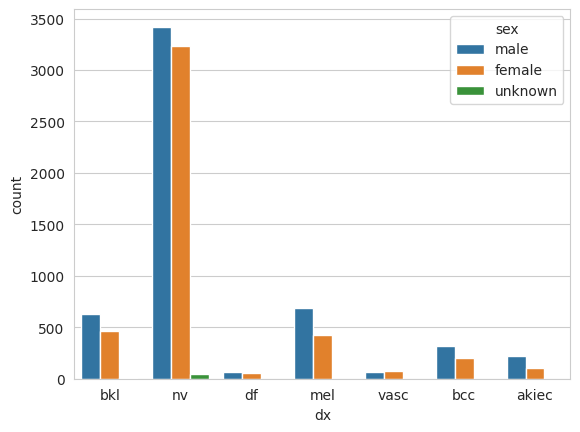

In [21]:
sns.set_style('whitegrid')
ax = sns.countplot(x='dx', hue='sex', data = df)

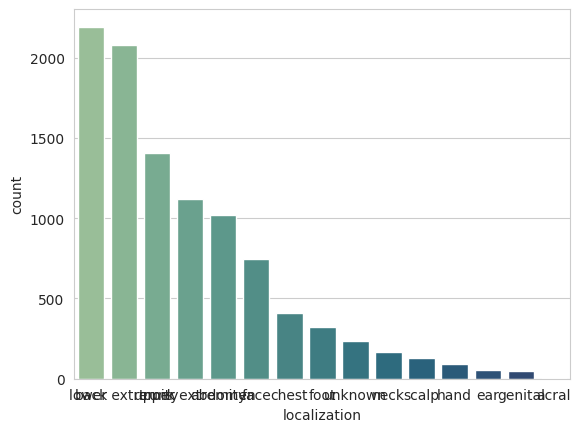

In [22]:
#localization plot analysis
sns.set_style('whitegrid')

ax = sns.countplot(x='localization', data=df, order=df['localization'].value_counts().index, palette='crest')

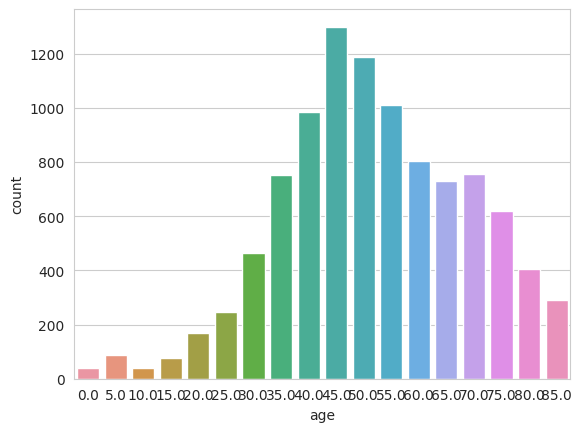

In [23]:
#age based analysis
sns.set_style('whitegrid')
ax = sns.countplot(x = 'age', data = df)

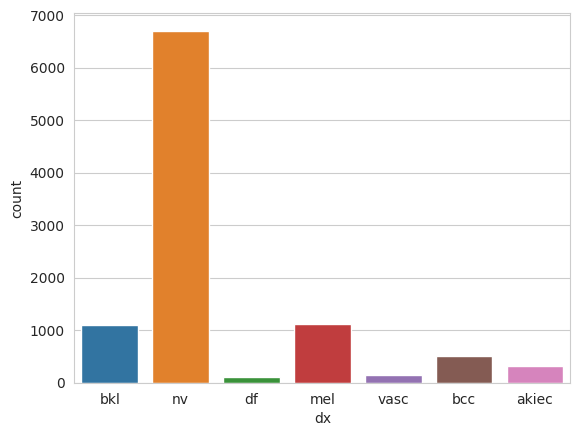

In [24]:
#cancer type affect on patients
sns.set_style('whitegrid')
ax = sns.countplot(x='dx',data=df)

In [25]:
#balancing the data and preprocessing
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

In [47]:
x_train.shape

(37373, 28, 28, 3)

<Axes: xlabel='label', ylabel='count'>

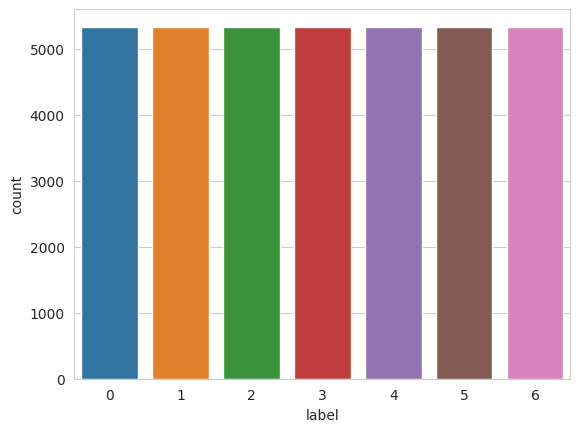

In [26]:
sns.countplot(x=y_train)

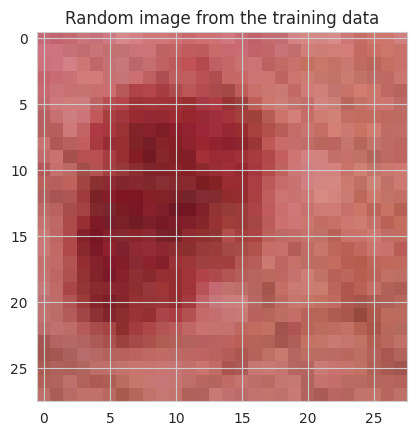

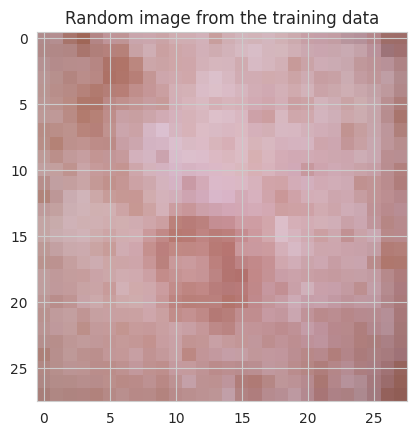

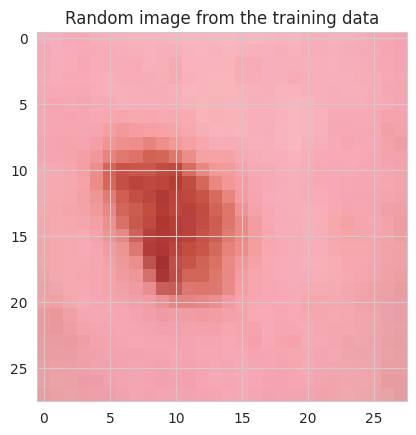

In [27]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from the training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from the training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from the training data")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train, test_size=0.2)


In [49]:
# creating CNN model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import tensorflow as tf

In [50]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=(28,28,3)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (2, 2)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (2, 2)))
model.add(Activation('swish'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('swish'))
model.add(Dropout(0.5))
model.add(Dense(7))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 27, 27, 32)        416       
                                                                 
 activation_6 (Activation)   (None, 27, 27, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 32)        4128      
                                                                 
 activation_7 (Activation)   (None, 12, 12, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                  

In [51]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer='nadam',
metrics=['accuracy'])

In [52]:

callback = tsf.keras.callbacks.ModelCheckpoint(filepath='skin_cancer.h5',
                                              monitor='val_acc',
                                              mode='max',
                                              verbose=1,
                                              save_best_only=True)

early_stopping = tsf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [65]:
#fit the model
from datetime import datetime

start_time = datetime.now()

history = model.fit(x_train,
                    y_train,
                    epochs = 100,
                    validation_split =0.2,
                    callbacks=[callback, early_stopping])

end_time = datetime.now()

print('Duration: {}'.format(end_time - start_time))

Epoch 1/100
747/748 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8553

748/748 [==============================] - 18s 24ms/step - loss: 0.4198 - accuracy: 0.8553 - val_loss: 0.3144 - val_accuracy: 0.8948
Epoch 2/100
747/748 [============================>.] - ETA: 0s - loss: 0.3241 - accuracy: 0.8817

748/748 [==============================] - 17s 23ms/step - loss: 0.3241 - accuracy: 0.8817 - val_loss: 0.3286 - val_accuracy: 0.8808
Epoch 3/100
747/748 [============================>.] - ETA: 0s - loss: 0.3549 - accuracy: 0.8735

748/748 [==============================] - 19s 25ms/step - loss: 0.3547 - accuracy: 0.8736 - val_loss: 0.3057 - val_accuracy: 0.9003
Epoch 4/100
746/748 [============================>.] - ETA: 0s - loss: 0.3459 - accuracy: 0.8760

748/748 [==============================] - 17s 23ms/step - loss: 0.3458 - accuracy: 0.8761 - val_loss: 0.2978 - val_accuracy: 0.8990
Epoch 5/100
747/748 [============================>.] - ETA: 0s - loss: 0.3404 - accuracy: 0.8781

748/748 [==============================] - 17s 23ms/step - loss: 0.3406 - accuracy: 0.8780 - val_loss: 0.3302 - val_accuracy: 0.8945
Epoch 6/100
746/748 [============================>.] - ETA: 0s - loss: 0.3447 - accuracy: 0.8790

748/748 [==============================] - 17s 23ms/step - loss: 0.3447 - accuracy: 0.8790 - val_loss: 0.3153 - val_accuracy: 0.8898
Epoch 7/100
748/748 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8751

748/748 [==============================] - 18s 24ms/step - loss: 0.3537 - accuracy: 0.8751 - val_loss: 0.2926 - val_accuracy: 0.8972
Epoch 8/100
746/748 [============================>.] - ETA: 0s - loss: 0.3171 - accuracy: 0.8879

748/748 [==============================] - 17s 23ms/step - loss: 0.3171 - accuracy: 0.8879 - val_loss: 0.3500 - val_accuracy: 0.8813
Epoch 9/100
747/748 [============================>.] - ETA: 0s - loss: 0.3824 - accuracy: 0.8696

748/748 [==============================] - 18s 24ms/step - loss: 0.3827 - accuracy: 0.8695 - val_loss: 0.4145 - val_accuracy: 0.8610
Epoch 10/100
748/748 [==============================] - ETA: 0s - loss: 0.3282 - accuracy: 0.8838

748/748 [==============================] - 17s 23ms/step - loss: 0.3282 - accuracy: 0.8838 - val_loss: 0.3105 - val_accuracy: 0.8968
Epoch 11/100
747/748 [============================>.] - ETA: 0s - loss: 0.3217 - accuracy: 0.8852

748/748 [==============================] - 18s 24ms/step - loss: 0.3216 - accuracy: 0.8852 - val_loss: 0.2820 - val_accuracy: 0.9059
Epoch 12/100
746/748 [============================>.] - ETA: 0s - loss: 0.3592 - accuracy: 0.8764

748/748 [==============================] - 18s 24ms/step - loss: 0.3595 - accuracy: 0.8762 - val_loss: 0.3489 - val_accuracy: 0.8779
Epoch 13/100
746/748 [============================>.] - ETA: 0s - loss: 0.3402 - accuracy: 0.8802

748/748 [==============================] - 18s 24ms/step - loss: 0.3400 - accuracy: 0.8803 - val_loss: 0.2954 - val_accuracy: 0.8987
Epoch 14/100
746/748 [============================>.] - ETA: 0s - loss: 0.3512 - accuracy: 0.8770

748/748 [==============================] - 18s 24ms/step - loss: 0.3512 - accuracy: 0.8770 - val_loss: 0.3048 - val_accuracy: 0.8963
Epoch 15/100
746/748 [============================>.] - ETA: 0s - loss: 0.3220 - accuracy: 0.8891

748/748 [==============================] - 18s 23ms/step - loss: 0.3219 - accuracy: 0.8892 - val_loss: 0.2805 - val_accuracy: 0.9075
Epoch 16/100
747/748 [============================>.] - ETA: 0s - loss: 0.3022 - accuracy: 0.8960

748/748 [==============================] - 17s 23ms/step - loss: 0.3023 - accuracy: 0.8960 - val_loss: 0.3194 - val_accuracy: 0.8978
Epoch 17/100
747/748 [============================>.] - ETA: 0s - loss: 0.3100 - accuracy: 0.8934

748/748 [==============================] - 18s 24ms/step - loss: 0.3098 - accuracy: 0.8934 - val_loss: 0.2946 - val_accuracy: 0.9012
Epoch 18/100
747/748 [============================>.] - ETA: 0s - loss: 0.3379 - accuracy: 0.8829

748/748 [==============================] - 17s 22ms/step - loss: 0.3378 - accuracy: 0.8830 - val_loss: 0.2672 - val_accuracy: 0.9115
Epoch 19/100
748/748 [==============================] - ETA: 0s - loss: 0.3281 - accuracy: 0.8860

748/748 [==============================] - 18s 24ms/step - loss: 0.3281 - accuracy: 0.8860 - val_loss: 0.2628 - val_accuracy: 0.9197
Epoch 20/100
746/748 [============================>.] - ETA: 0s - loss: 0.3349 - accuracy: 0.8841

748/748 [==============================] - 17s 22ms/step - loss: 0.3348 - accuracy: 0.8841 - val_loss: 0.2648 - val_accuracy: 0.9144
Epoch 21/100
748/748 [==============================] - ETA: 0s - loss: 0.3221 - accuracy: 0.8882

748/748 [==============================] - 18s 24ms/step - loss: 0.3221 - accuracy: 0.8882 - val_loss: 0.2813 - val_accuracy: 0.9107
Epoch 22/100
747/748 [============================>.] - ETA: 0s - loss: 0.2946 - accuracy: 0.8963

748/748 [==============================] - 17s 23ms/step - loss: 0.2945 - accuracy: 0.8963 - val_loss: 0.3185 - val_accuracy: 0.8891
Epoch 23/100
747/748 [============================>.] - ETA: 0s - loss: 0.3185 - accuracy: 0.8893

748/748 [==============================] - 18s 24ms/step - loss: 0.3184 - accuracy: 0.8894 - val_loss: 0.3462 - val_accuracy: 0.8828
Epoch 24/100
746/748 [============================>.] - ETA: 0s - loss: 0.3410 - accuracy: 0.8844

748/748 [==============================] - 18s 24ms/step - loss: 0.3411 - accuracy: 0.8843 - val_loss: 0.3564 - val_accuracy: 0.8758
Epoch 25/100
747/748 [============================>.] - ETA: 0s - loss: 0.2890 - accuracy: 0.9009

748/748 [==============================] - 17s 23ms/step - loss: 0.2890 - accuracy: 0.9009 - val_loss: 0.3089 - val_accuracy: 0.8962
Epoch 26/100
746/748 [============================>.] - ETA: 0s - loss: 0.3373 - accuracy: 0.8853

748/748 [==============================] - 17s 22ms/step - loss: 0.3373 - accuracy: 0.8854 - val_loss: 0.3332 - val_accuracy: 0.8921
Epoch 27/100
746/748 [============================>.] - ETA: 0s - loss: 0.2953 - accuracy: 0.8985

748/748 [==============================] - 17s 22ms/step - loss: 0.2954 - accuracy: 0.8984 - val_loss: 0.3000 - val_accuracy: 0.9038
Epoch 28/100
747/748 [============================>.] - ETA: 0s - loss: 0.3237 - accuracy: 0.8885

748/748 [==============================] - 19s 25ms/step - loss: 0.3238 - accuracy: 0.8885 - val_loss: 0.2542 - val_accuracy: 0.9152
Epoch 29/100
746/748 [============================>.] - ETA: 0s - loss: 0.3151 - accuracy: 0.8923

748/748 [==============================] - 17s 22ms/step - loss: 0.3147 - accuracy: 0.8925 - val_loss: 0.2521 - val_accuracy: 0.9236
Epoch 30/100
747/748 [============================>.] - ETA: 0s - loss: 0.2809 - accuracy: 0.9024

748/748 [==============================] - 18s 24ms/step - loss: 0.2810 - accuracy: 0.9023 - val_loss: 0.3810 - val_accuracy: 0.8726
Epoch 31/100
748/748 [==============================] - ETA: 0s - loss: 0.3184 - accuracy: 0.8898

748/748 [==============================] - 18s 24ms/step - loss: 0.3184 - accuracy: 0.8898 - val_loss: 0.4354 - val_accuracy: 0.8488
Epoch 32/100
745/748 [============================>.] - ETA: 0s - loss: 0.2958 - accuracy: 0.8974

748/748 [==============================] - 17s 23ms/step - loss: 0.2964 - accuracy: 0.8971 - val_loss: 0.4769 - val_accuracy: 0.8415
Epoch 33/100
747/748 [============================>.] - ETA: 0s - loss: 0.3114 - accuracy: 0.8944

748/748 [==============================] - 17s 22ms/step - loss: 0.3114 - accuracy: 0.8944 - val_loss: 0.3147 - val_accuracy: 0.9074
Epoch 34/100
746/748 [============================>.] - ETA: 0s - loss: 0.3306 - accuracy: 0.8891

748/748 [==============================] - 19s 25ms/step - loss: 0.3303 - accuracy: 0.8892 - val_loss: 0.2687 - val_accuracy: 0.9129
Epoch 35/100
747/748 [============================>.] - ETA: 0s - loss: 0.3006 - accuracy: 0.8953

748/748 [==============================] - 17s 22ms/step - loss: 0.3019 - accuracy: 0.8952 - val_loss: 0.2564 - val_accuracy: 0.9171
Epoch 36/100
747/748 [============================>.] - ETA: 0s - loss: 0.3107 - accuracy: 0.8919

748/748 [==============================] - 17s 23ms/step - loss: 0.3106 - accuracy: 0.8919 - val_loss: 0.2519 - val_accuracy: 0.9186
Epoch 37/100
747/748 [============================>.] - ETA: 0s - loss: 0.2697 - accuracy: 0.9067

748/748 [==============================] - 18s 24ms/step - loss: 0.2698 - accuracy: 0.9066 - val_loss: 0.2563 - val_accuracy: 0.9214
Epoch 38/100
747/748 [============================>.] - ETA: 0s - loss: 0.2971 - accuracy: 0.8986

748/748 [==============================] - 18s 23ms/step - loss: 0.2970 - accuracy: 0.8986 - val_loss: 0.3306 - val_accuracy: 0.8926
Epoch 39/100
747/748 [============================>.] - ETA: 0s - loss: 0.3185 - accuracy: 0.8930

748/748 [==============================] - 17s 22ms/step - loss: 0.3184 - accuracy: 0.8931 - val_loss: 0.2867 - val_accuracy: 0.9085
Epoch 40/100
747/748 [============================>.] - ETA: 0s - loss: 0.2748 - accuracy: 0.9046

748/748 [==============================] - 17s 23ms/step - loss: 0.2750 - accuracy: 0.9045 - val_loss: 0.3153 - val_accuracy: 0.9013
Epoch 41/100
747/748 [============================>.] - ETA: 0s - loss: 0.3011 - accuracy: 0.8977

748/748 [==============================] - 17s 23ms/step - loss: 0.3011 - accuracy: 0.8977 - val_loss: 0.2682 - val_accuracy: 0.9100
Epoch 42/100
745/748 [============================>.] - ETA: 0s - loss: 0.2919 - accuracy: 0.9021

748/748 [==============================] - 18s 24ms/step - loss: 0.2922 - accuracy: 0.9019 - val_loss: 0.3864 - val_accuracy: 0.8699
Epoch 43/100
748/748 [==============================] - ETA: 0s - loss: 0.2845 - accuracy: 0.9024

748/748 [==============================] - 17s 23ms/step - loss: 0.2845 - accuracy: 0.9024 - val_loss: 0.2501 - val_accuracy: 0.9293
Epoch 44/100
748/748 [==============================] - ETA: 0s - loss: 0.5343 - accuracy: 0.8447

748/748 [==============================] - 17s 22ms/step - loss: 0.5343 - accuracy: 0.8447 - val_loss: 1.9764 - val_accuracy: 0.1838
Epoch 45/100
745/748 [============================>.] - ETA: 0s - loss: 1.4542 - accuracy: 0.4385

748/748 [==============================] - 17s 23ms/step - loss: 1.4524 - accuracy: 0.4395 - val_loss: 0.7851 - val_accuracy: 0.7166
Epoch 46/100
748/748 [==============================] - ETA: 0s - loss: 0.7164 - accuracy: 0.7544

748/748 [==============================] - 17s 23ms/step - loss: 0.7164 - accuracy: 0.7544 - val_loss: 0.3810 - val_accuracy: 0.8799
Epoch 47/100
747/748 [============================>.] - ETA: 0s - loss: 0.4128 - accuracy: 0.8605

748/748 [==============================] - 17s 23ms/step - loss: 0.4127 - accuracy: 0.8606 - val_loss: 0.3153 - val_accuracy: 0.9028
Epoch 48/100
748/748 [==============================] - ETA: 0s - loss: 0.3322 - accuracy: 0.8876

748/748 [==============================] - 18s 24ms/step - loss: 0.3322 - accuracy: 0.8876 - val_loss: 0.3048 - val_accuracy: 0.9043
Epoch 49/100
747/748 [============================>.] - ETA: 0s - loss: 0.3107 - accuracy: 0.8947

748/748 [==============================] - 19s 25ms/step - loss: 0.3106 - accuracy: 0.8948 - val_loss: 0.2866 - val_accuracy: 0.9038
Epoch 50/100
748/748 [==============================] - ETA: 0s - loss: 0.3254 - accuracy: 0.8909

748/748 [==============================] - 17s 22ms/step - loss: 0.3254 - accuracy: 0.8909 - val_loss: 0.2662 - val_accuracy: 0.9151
Epoch 51/100
746/748 [============================>.] - ETA: 0s - loss: 0.3147 - accuracy: 0.8944

748/748 [==============================] - 18s 23ms/step - loss: 0.3146 - accuracy: 0.8945 - val_loss: 0.2703 - val_accuracy: 0.9139
Epoch 52/100
747/748 [============================>.] - ETA: 0s - loss: 0.3083 - accuracy: 0.8963

748/748 [==============================] - 17s 22ms/step - loss: 0.3085 - accuracy: 0.8963 - val_loss: 0.2864 - val_accuracy: 0.9054
Epoch 53/100
746/748 [============================>.] - ETA: 0s - loss: 0.3061 - accuracy: 0.8961

748/748 [==============================] - 18s 24ms/step - loss: 0.3061 - accuracy: 0.8961 - val_loss: 0.2712 - val_accuracy: 0.9119
Duration: 0:15:28.307720


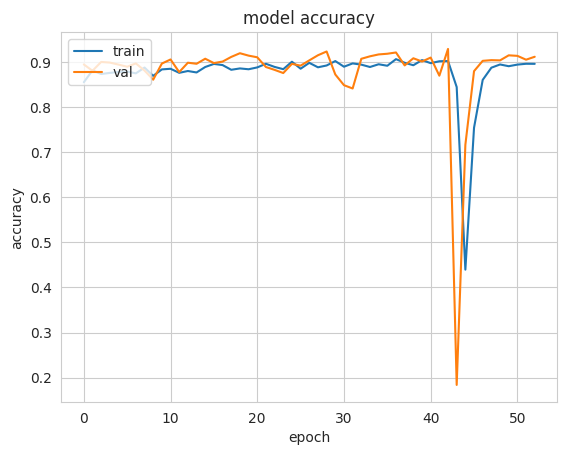

In [66]:
#Evaluating the model
plt.plot(history.history['accuracy'])

plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')

plt.ylabel('accuracy')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

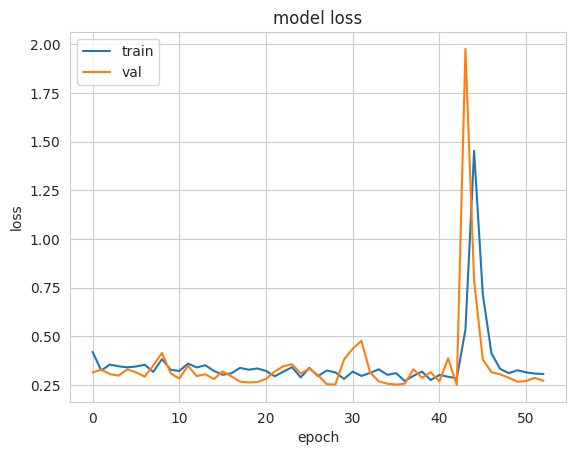

In [67]:
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])

plt.title('model loss')

plt.ylabel('loss')

plt.xlabel('epoch')

plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [68]:
# saving the model
model.save('skin_cancer.h5')
print('Model Saved!')

Model Saved!


In [69]:
#load the model
model.load_weights('skin_cancer.h5')

In [70]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

234/234 - 2s - loss: 0.2334 - accuracy: 0.9260 - 2s/epoch - 7ms/step


In [71]:
model.evaluate(x_train,y_train)

935/935 [==============================] - 8s 8ms/step - loss: 0.1604 - accuracy: 0.9497


[0.16044855117797852, 0.9496956467628479]

In [72]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

confusion_mat = confusion_matrix(y_test, y_pred)

234/234 [==============================] - 2s 10ms/step


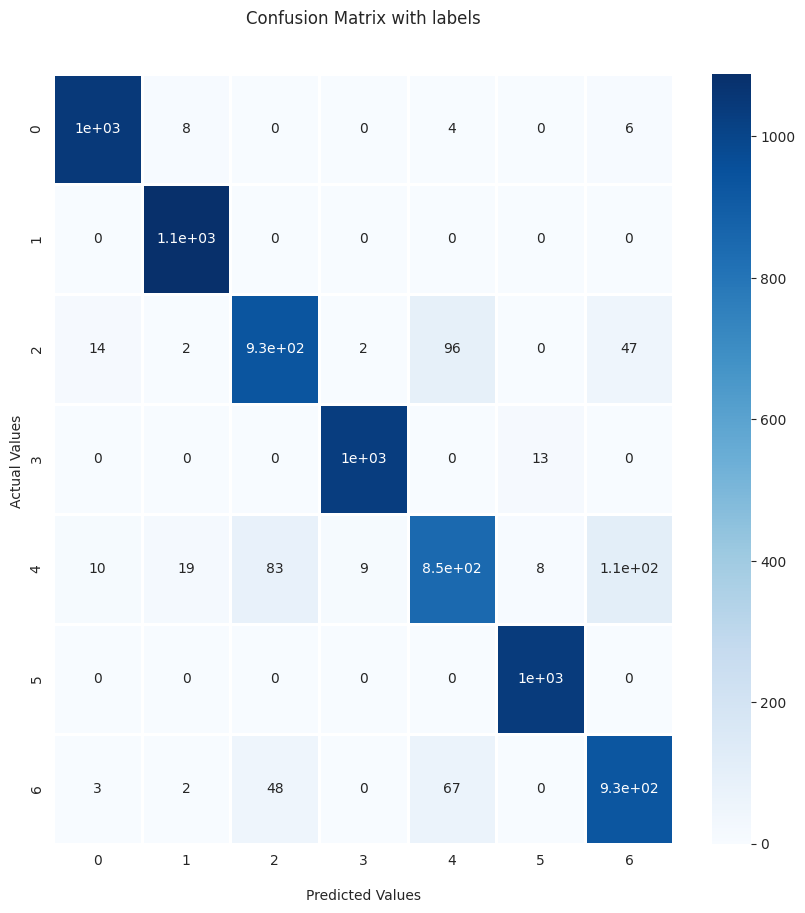

In [73]:
#the confusion matrix analysis
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(confusion_mat, annot=True, cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

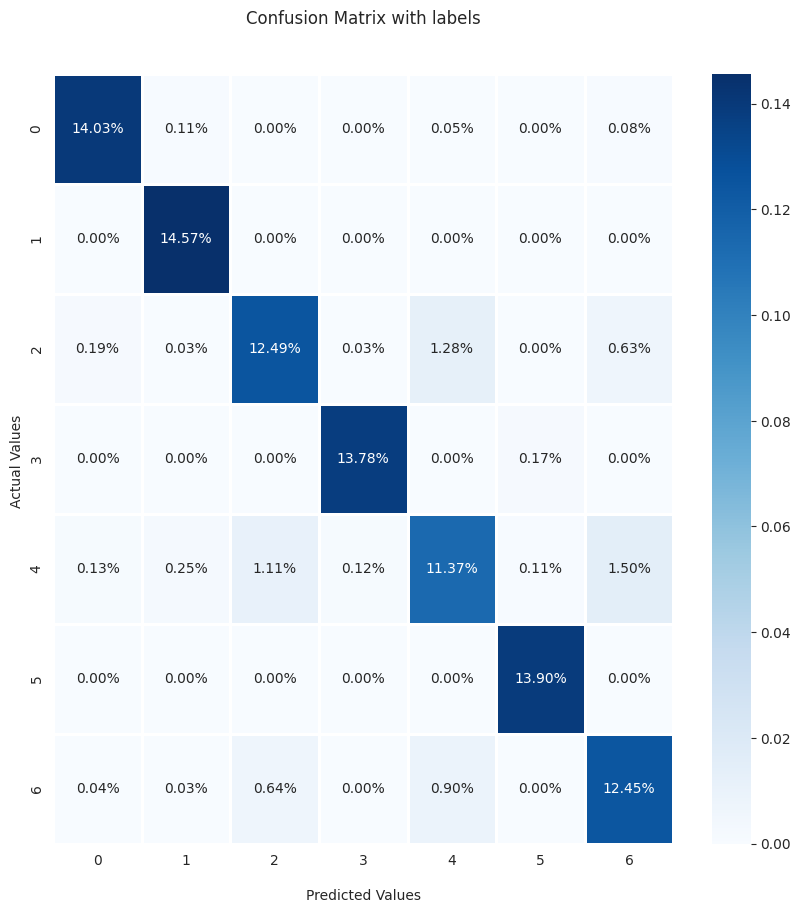

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))


ax = sns.heatmap(confusion_mat/np.sum(confusion_mat), annot=True, fmt='.2%', cmap='Blues', linewidths=.9, ax=ax)

ax.set_title('Confusion Matrix with labels\n\n');

ax.set_xlabel('\nPredicted Values')

ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6'])

ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6'])

plt.show()

In [75]:
#test a sample image to evaluate
import PIL

image=PIL.Image.open('skin.jpg')

image=image.resize((28,28))

img=x_test[1]

img=np.array(image).reshape(-1,28,28,3)

result=model.predict(img)

print(result[0])

result=result.tolist()

max_prob=max(result[0])

class_ind=result[0].index(max_prob)

print(classes[class_ind])
image.show()

1/1 [==============================] - 0s 23ms/step
[3.2478928e-09 3.9573324e-23 7.8095809e-02 3.7629584e-29 3.4817475e-01
 1.8307181e-14 5.7372952e-01]
('ml', 'melanoma')
